In [7]:
# pip install pandas

In [22]:
# pip install streamlit

In [21]:
# pip install scipy matplotlib seaborn scikit-learn statsmodels

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [25]:
#load csv
df = pd.read_csv('data/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [26]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [27]:
df= df.drop(columns=['ID'], errors='ignore')
df= df.astype(float)

In [28]:
df["MARRIAGE"]= df["MARRIAGE"].replace(0, 3)

In [ ]:
df["EDUCATION"]= df["EDUCATION"].replace([0, 5, 6],4)

In [33]:
df.rename(columns={'default.payment.next.month':'default'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)


In [34]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


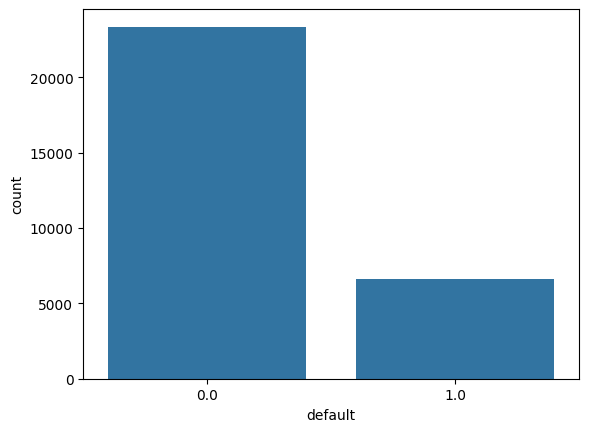

In [35]:
sns.countplot(x= "default", data=df)
plt.show()  
#0 = No Default, 1 = Default

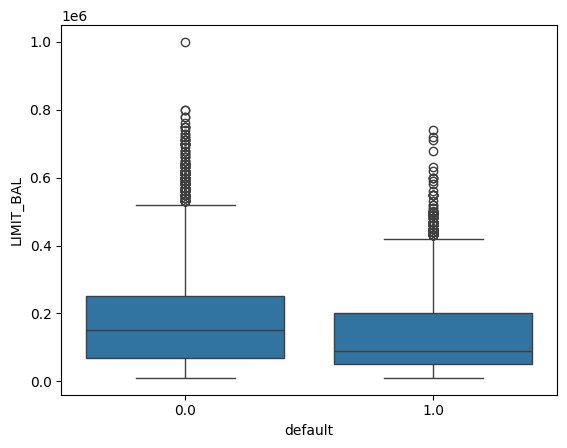

In [36]:
sns.boxplot(x="default", y="LIMIT_BAL", data=df)
plt.show()

In [46]:
def calculate_avg_payment_column(input_data):
    print("function loaded successfully")
    pay_column = ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
    bill_column = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

    input_data['Avg_pay_amt'] = input_data[pay_column].mean(axis=1)
    input_data["Avg_bill_pay"] = input_data[bill_column].mean(axis=1)
    input_data['Max_Delay']= input_data[pay_column].max(axis=1)

    return input_data


In [39]:
pay_column = ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
df.groupby("default")[pay_column].mean()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
default,,,,,,
0.0,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,-0.405624
1.0,0.668174,0.458258,0.362116,0.254521,0.167872,0.112116


In [15]:
# df['Avg_bill_pay']= df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)
# df['Avg_pay_amt']= df[pay_column].mean(axis=1)
# df['Max_Delay']= df[pay_column].max(axis=1)

In [40]:
x = df.drop("default", axis=1)
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
sclare = StandardScaler()

X_train_scaled = sclare.fit_transform(X_train)
X_test_scaled = sclare.transform(X_test)


model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]
print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      4673
         1.0       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000

0.8083333333333333


In [41]:
import joblib
joblib.dump(model, 'model/credit_default_model.pkl')

['model/credit_default_model.pkl']

In [42]:
model = joblib.load('model/credit_default_model.pkl')
sample_data = X_test.iloc[0:1]
prediction = model.predict(sample_data)
probability = model.predict_proba(sample_data)
print("Predicted Class:", prediction)
print("Predicted Probabilities:", probability)

Predicted Class: [0.]
Predicted Probabilities: [[1. 0.]]


c:\Users\thasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\thasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [43]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [44]:
featues_col = x.columns
joblib.dump(featues_col, "model/features.pkl")

['model/features.pkl']